<a id='2.0'></a>
<div style="text-align: center;">
    <h2 style="font-family: garamond; font-size: 30px; font-style: normal; letter-spacing: 3px; background-color:#1E90FF; color: #FFCE30; border-radius: 6px 6px; padding: 3px; text-align: center; font-weight: bold;">AMAÇ<br>Tablodan alınan verilerle yalnızca kapanış fiyatlarını kullanarak bir RNN (Recurrent Neural Network) modeli oluşturulmuştur.</h2>
</div>


<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1E90FF ; color : #FFCE30; border-radius: 6px 6px; padding:3px;text-align:center; font-weight: bold" >Import Data Set And DATA Preparing</h2> 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.io as pio


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
pio.templates.default = "plotly_dark"


In [2]:
train = pd.read_csv("Google_Stock_Price_Train.csv", parse_dates=['Date'], index_col="Date")

In [3]:
test = pd.read_csv("Google_Stock_Price_Test.csv", parse_dates=['Date'], index_col="Date")

In [4]:
train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.250,332.830,324.970,663.59,"7,380,500"
2012-01-04,331.270,333.870,329.080,666.45,"5,749,400"
2012-01-05,329.830,330.750,326.890,657.21,"6,590,300"
2012-01-06,328.340,328.770,323.680,648.24,"5,405,900"
2012-01-09,322.040,322.290,309.460,620.76,"11,688,800"


In [5]:
test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.810,789.630,775.800,786.140,"1,657,300"
2017-01-04,788.360,791.340,783.160,786.900,"1,073,000"
2017-01-05,786.080,794.480,785.020,794.020,"1,335,200"
2017-01-06,795.260,807.900,792.200,806.150,"1,640,200"
2017-01-09,806.400,809.970,802.830,806.650,"1,272,400"


In [6]:
train.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)

In [7]:
test.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)

In [8]:
train.head()

,Close
Date,
2012-01-03,663.59
2012-01-04,666.45
2012-01-05,657.21
2012-01-06,648.24
2012-01-09,620.76


In [9]:
test.head()

,Close
Date,
2017-01-03,786.140
2017-01-04,786.900
2017-01-05,794.020
2017-01-06,806.150
2017-01-09,806.650


index_col="Date" ifadesini kullanarak "Date" sütununu veri kümesinin indeksi olarak belirttiğimizde, veri çerçevesindeki her satır benzersiz bir zaman damgasıyla tanımlanır. Bu durumda "Date" sütunu, satırları birbirinden ayıran benzersiz bir kimlik görevi görür.

Bunun bazı faydaları şunlardır:

Hızlı erişim: Veri çerçevesindeki belirli bir zaman damgasına ait satırlara hızlı bir şekilde erişebilirsiniz. Zaman damgasına dayalı indeksleme, örneğin belirli bir tarih aralığındaki verileri seçmek veya belirli bir zamanda meydana gelen olayları incelemek gibi işlemleri kolaylaştırır.

Zaman serisi analizi: Zaman serisi verileriyle çalışırken, verileri zamana göre sıralamak ve analiz etmek önemlidir. Zaman damgasını indeks olarak belirleyerek, zaman serisi analizine yönelik çeşitli teknikleri kullanabilirsiniz. Örneğin, trendleri, mevsimsellikleri veya zaman içindeki değişiklikleri analiz edebilirsiniz.

Veri hızlandırma: Veri kümesini bir zaman damgasına göre indekslemek, veriye yapılan sorguları hızlandırabilir. Verinin indekslenmesi, belirli bir zaman damgasıyla ilgili satırların hızlı bir şekilde erişilmesini sağlar. Bu, büyük veri kümesi üzerinde yapılan işlemlerde performansı artırabilir.

Grafik çizimi ve görselleştirme: İndekslendiğinde, zaman damgası verilerini içeren veri çerçevesi, doğrudan grafik çizimi ve görselleştirme araçlarına beslenebilir. Zaman serisi verilerini zamanla değişimi gösteren grafikler veya trend analizi gibi görsel temsillerle daha kolay anlayabilirsiniz.

Özetle, zaman damgasını indeks olarak belirlemek, zaman serisi verileriyle çalışırken veriye daha etkili bir şekilde erişmek, analiz etmek ve görselleştirmek için önemli bir adımdır.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1258 non-null   object
dtypes: object(1)
memory usage: 19.7+ KB


In [11]:
train['Close'] = train['Close'].str.replace(',', '').astype(float)

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [13]:
train.isnull().sum()

Close    0
dtype: int64

In [14]:
test.isnull().sum()

Close    0
dtype: int64

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1258.000,712.670,164.753,491.200,576.740,695.675,782.105,1216.830


In [16]:
len(train)

1258

In [17]:
len(test)

20

In [18]:
train.head(5)

,Close
Date,
2012-01-03,663.590
2012-01-04,666.450
2012-01-05,657.210
2012-01-06,648.240
2012-01-09,620.760


## 
<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1E90FF ; color : #FFCE30; border-radius: 6px 6px; padding:3px;text-align:center; font-weight: bold" >Scaling</h2> 

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

Bu kod parçası, veri önişleme adımında yer almaktadır. scaler adlı bir ölçekleyici nesnesi kullanılarak, eğitim ve test verileri ölçeklendirilmektedir.

fit_transform() yöntemi, scaler nesnesini eğitim verilerine uygulayarak verileri ölçeklendirir ve dönüştürür. Eğitim verileri üzerinde ölçeklendirme işlemi yapılırken, ölçekleyici nesne eğitim verilerine uyum sağlamak için verileri analiz eder ve istatistiksel bilgileri kullanarak verileri ölçeklendirir.

Daha sonra, transform() yöntemi kullanılarak aynı ölçekleyici nesne, test verilerine uygulanır. Bu durumda, ölçekleyici nesne, eğitim verilerine dayalı olarak öğrendiği ölçekleme faktörlerini kullanarak test verilerini ölçeklendirir. Bu şekilde, eğitim ve test verileri aynı ölçeklendirme faktörlerine göre uygun bir şekilde dönüştürülür.

Bu işlem, verilerin ölçeklendirilerek aynı aralığa getirilmesini sağlar. Ölçeklendirme, modelin daha iyi performans göstermesine ve daha istikrarlı sonuçlar üretmesine yardımcı olabilir.


<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1E90FF ; color : #FFCE30; border-radius: 6px 6px; padding:3px;text-align:center; font-weight: bold" >TimeseriesGenerator</h2> 

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [24]:
len(generator)

1246

In [25]:
generator[0]

(array([[[0.23757287],
         [0.24151427],
         [0.22878051],
         [0.21641884],
         [0.1785483 ],
         [0.17947163],
         [0.18335791],
         [0.18841558],
         [0.18202114],
         [0.18695478],
         [0.19290823],
         [0.2020589 ]]]),
 array([[0.12842633]]))



<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1E90FF ; color : #FFCE30; border-radius: 6px 6px; padding:3px;text-align:center; font-weight: bold" >Modelling & Model Performance</h2> 

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [27]:
train_scaled.shape

(1258, 1)

In [28]:
n_features = train_scaled.shape[1]
n_features

1


<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1E90FF ; color : #FFCE30; border-radius: 6px 6px; padding:3px;text-align:center; font-weight: bold" >With "tanh" activation function</h2> 

In [29]:
from keras.layers import Dropout

model = Sequential()
model.add(SimpleRNN(units=128, activation="tanh", input_shape=(length, n_features)))
model.add(Dropout(0.2))  # Dropout katmanı eklendi, dropout oranı 0.2 olarak ayarlandı
model.add(Dense(64, activation="tanh"))  # Aktivasyon fonksiyonu olarak "relu" kullanıldı
model.add(Dense(32, activation="tanh"))  # Aktivasyon fonksiyonu olarak "tanh" kullanıldı
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,009 (105.50 KB)

 Trainable params: 27,009 (105.50 KB)

 Non-trainable params: 0 (0.00 B)



<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1E90FF ; color : #FFCE30; border-radius: 6px 6px; padding:3px;text-align:center; font-weight: bold" >EarlyStopping and Validation Generator</h2> 

In [32]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [33]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [34]:
model.fit(generator,
            epochs = 30,
            validation_data = validation_generator,
            callbacks = [early_stop])

Epoch 1/30


1246/1246 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0108 - val_loss: 0.0013
Epoch 2/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 3/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0018 - val_loss: 4.6962e-04
Epoch 4/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0046 - val_loss: 4.0944e-04
Epoch 5/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0025 - val_loss: 2.2563e-04
Epoch 6/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0021 - val_loss: 2.9961e-04
Epoch 7/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 8/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 9/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0021 - val_loss: 2.7997e-04
Epoch 10/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0015 - val_loss: 0.0019


<Axes: >

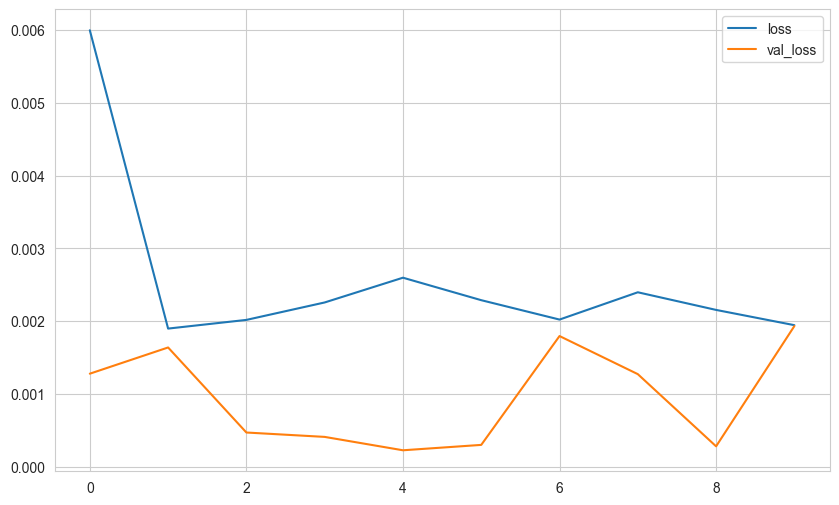

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()


<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1E90FF ; color : #FFCE30; border-radius: 6px 6px; padding:3px;text-align:center; font-weight: bold" >Evaluation on Test Datar</h2> 

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    return print("\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [38]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [39]:
current_pred

array([[0.2621883]], dtype=float32)

In [41]:
current_batch

array([[[0.37789431],
        [0.36944261],
        [0.36036262],
        [0.35097995],
        [0.34137571],
        [0.33146811],
        [0.32084537],
        [0.30995071],
        [0.29881003],
        [0.287108  ],
        [0.27510673],
        [0.26218829]]])

In [42]:
predictions_scaled

[array([0.3778943], dtype=float32),
 array([0.3694426], dtype=float32),
 array([0.36036262], dtype=float32),
 array([0.35097995], dtype=float32),
 array([0.3413757], dtype=float32),
 array([0.3314681], dtype=float32),
 array([0.32084537], dtype=float32),
 array([0.3099507], dtype=float32),
 array([0.29881003], dtype=float32),
 array([0.287108], dtype=float32),
 array([0.27510673], dtype=float32),
 array([0.2621883], dtype=float32)]

In [43]:
eval_metrics(test_scaled[:length], predictions_scaled)


mae: 0.10402352627672777 
mse: 0.012741970971197267 
rmse: 0.11288033917027919



<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1E90FF ; color : #FFCE30; border-radius: 6px 6px; padding:3px;text-align:center; font-weight: bold" >Inverse Transformation and Comparing</h2> 

In [44]:
predictions = scaler.inverse_transform(predictions_scaled)

In [45]:
compare = test[:12]
compare['Predictions_tanh'] = predictions
compare

,Close,Predictions_tanh
Date,,
2017-01-03,786.140,765.411
2017-01-04,786.900,759.279
2017-01-05,794.020,752.690
2017-01-06,806.150,745.882
2017-01-09,806.650,738.912
2017-01-10,804.790,731.723
2017-01-11,807.910,724.015
2017-01-12,806.360,716.110
2017-01-13,807.880,708.026


<Axes: xlabel='Date'>

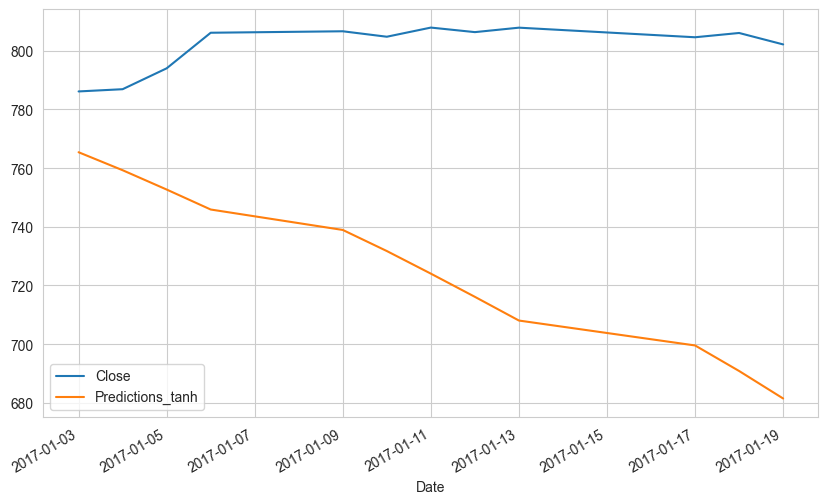

In [46]:
compare.plot()

In [48]:
eval_metrics(compare.Close, compare.Predictions_tanh)


mae: 75.48259137218196 
mse: 6709.143339506026 
rmse: 81.90936051212967



<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1E90FF ; color : #FFCE30; border-radius: 6px 6px; padding:3px;text-align:center; font-weight: bold" >With "relu" activation function</h2> 

In [49]:
model = Sequential()
model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 12, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [52]:
model.fit(generator,
            epochs = 30,
            validation_data = validation_generator,
            callbacks = [early_stop])

Epoch 1/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.0244 - val_loss: 8.6521e-04
Epoch 2/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0066 - val_loss: 7.5222e-04
Epoch 3/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0041 - val_loss: 5.5661e-04
Epoch 4/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0028 - val_loss: 6.3423e-04
Epoch 5/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 6/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 7/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 8/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0027 - val_loss: 6.7308e-04


<Axes: >

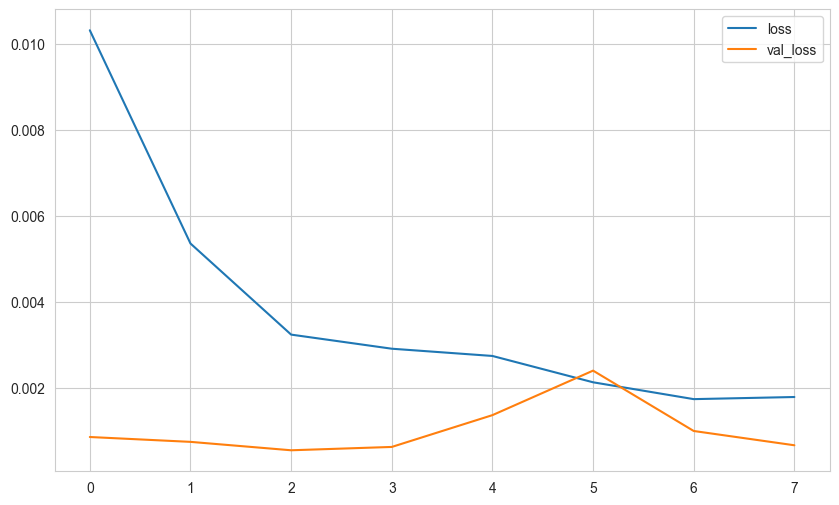

In [53]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()


<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1E90FF ; color : #FFCE30; border-radius: 6px 6px; padding:3px;text-align:center; font-weight: bold" >Evaluation on Test Data</h2> 

In [54]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step



<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1E90FF ; color : #FFCE30; border-radius: 6px 6px; padding:3px;text-align:center; font-weight: bold" >Inverse Transformation and Comparing</h2> 

In [55]:
predictions = scaler.inverse_transform(predictions_scaled)

In [56]:
compare['Predictions_relu'] = predictions
compare

,Close,Predictions_tanh,Predictions_relu
Date,,,
2017-01-03,786.140,765.411,795.504
2017-01-04,786.900,759.279,794.094
2017-01-05,794.020,752.690,793.553
2017-01-06,806.150,745.882,793.769
2017-01-09,806.650,738.912,794.658
2017-01-10,804.790,731.723,796.057
2017-01-11,807.910,724.015,797.703
2017-01-12,806.360,716.110,799.418
2017-01-13,807.880,708.026,801.184


<Axes: xlabel='Date'>

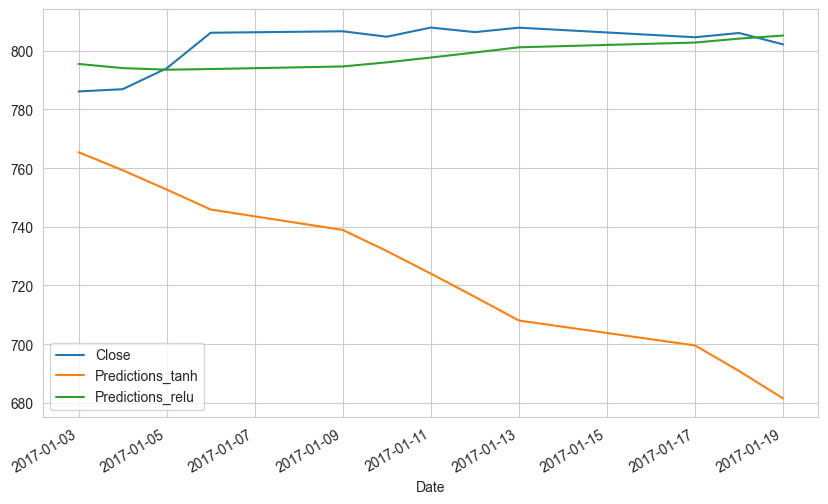

In [57]:
compare.plot()

In [58]:
eval_metrics(compare.Close, compare.Predictions_relu)


mae: 6.727742934773374 
mse: 60.53228374750057 
rmse: 7.780249594164738


<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1E90FF ; color : #FFCE30; border-radius: 6px 6px; padding:3px;text-align:center; font-weight: bold" >Retrain and Forecasting - Create Final Model with full Data</h2> 

In [59]:
full_data = pd.concat([train, test])

In [60]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(full_data)

In [62]:
full_data.head()

,Close
Date,
2012-01-03,663.590
2012-01-04,666.450
2012-01-05,657.210
2012-01-06,648.240
2012-01-09,620.760


In [63]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [64]:
len(full_data)

1278

In [65]:
len(generator)

1266

In [66]:
# Initialising the RNN
model = Sequential()

# Adding the first RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50,activation='relu', return_sequences = True, input_shape = (length, n_features)))
model.add(Dropout(0.2)) 
# Adding a second RNN layer and some Dropout regularisation.
model.add(SimpleRNN(units = 50,activation='relu', return_sequences = True))
model.add(Dropout(0.2))
# Adding a third RNN layer and some Dropout regularisation. 
model.add(SimpleRNN(units = 50,activation='relu', return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth RNN layer and some Dropout regularisation.
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mse')

# Fitting the RNN to the Training set
model.fit(generator, epochs = 40, batch_size = 32)


Epoch 1/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0374
Epoch 2/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0102
Epoch 3/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0090
Epoch 4/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0053
Epoch 5/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0060
Epoch 6/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0050
Epoch 7/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0055
Epoch 8/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0035
Epoch 9/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0040
Epoch 10/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0034
Epoch 11/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0037
Epoch 12/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0055
Epoch 13/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0050
Epoch 14/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0041
Epoch 15/40
1266/1266 ━━━━━━

In [ ]:
model = Sequential()

model.add(SimpleRNN(units=128, activation="tanh", input_shape=(length, n_features)))
model.add(Dropout(0.2))  # Dropout katmanı eklendi, dropout oranı 0.2 olarak ayarlandı
model.add(Dense(64, activation="relu"))  # Aktivasyon fonksiyonu olarak "relu" kullanıldı
model.add(Dense(32, activation="tanh"))  # Aktivasyon fonksiyonu olarak "tanh" kullanıldı
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

model.fit(generator, epochs=30)

Epoch 1/30


1266/1266 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0121
Epoch 2/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0017
Epoch 3/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0088
Epoch 4/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0014
Epoch 5/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0014
Epoch 6/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043
Epoch 7/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0024
Epoch 8/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0013
Epoch 9/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0024
Epoch 10/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0012
Epoch 11/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0637
Epoch 12/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0591
Epoch 13/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0549
Epoch 14/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0582
Epoch 15/30
1266/1266 ━━━━━━━━━━━━━━━━━━

In [67]:
forecast = []
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [68]:
forecast = scaler.inverse_transform(forecast)

In [69]:
forecast

array([[806.22446522],
       [802.19322012],
       [799.7660002 ],
       [796.70738176],
       [794.434892  ],
       [792.32941567],
       [789.93733713],
       [787.86778068],
       [786.51497846],
       [784.99488168],
       [783.21151656],
       [781.98855359]])

In [70]:
full_data

,Close
Date,
2012-01-03,663.590
2012-01-04,666.450
2012-01-05,657.210
2012-01-06,648.240
2012-01-09,620.760
...,...
2017-01-25,835.670
2017-01-26,832.150
2017-01-27,823.310


In [71]:
test.head()

,Close
Date,
2017-01-03,786.140
2017-01-04,786.900
2017-01-05,794.020
2017-01-06,806.150
2017-01-09,806.650


'D': Günlük

'W': Haftalık

'M': Aylık (ayın sonu)

'MS': Aylık (ayın başı)

'Q': Üç aylık

'A': Yıllık (yılın sonu)

'AS': Yıllık (yılın başı)

In [72]:
forecast_index = pd.date_range(start = '2014-03-27', periods = length, freq = 'MS')

In [73]:
forecast_index

DatetimeIndex(['2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01'],
              dtype='datetime64[ns]', freq='MS')

In [74]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [75]:
forecast_df

,Forecast
2014-04-01,806.224
2014-05-01,802.193
2014-06-01,799.766
2014-07-01,796.707
2014-08-01,794.435
2014-09-01,792.329
2014-10-01,789.937
2014-11-01,787.868
2014-12-01,786.515
2015-01-01,784.995


In [83]:
train['2014':'2015'][train['Close'] < 1200].reset_index().head(45)

,Date,Close
0,2014-01-02,1110.070
1,2014-01-03,1101.970
2,2014-01-06,1114.260
3,2014-01-07,1135.740
4,2014-01-08,1138.110
5,2014-01-09,1127.150
6,2014-01-10,1127.090
7,2014-01-13,1119.910
8,2014-01-14,1146.250
9,2014-01-15,1145.480


42	2014-03-26	1128.870

43	2014-03-27	556.930

42. satırda çok büyük bir düşüş gerçekleşmiş ilk olarak bu değerden sonra tahminde bulunacağız

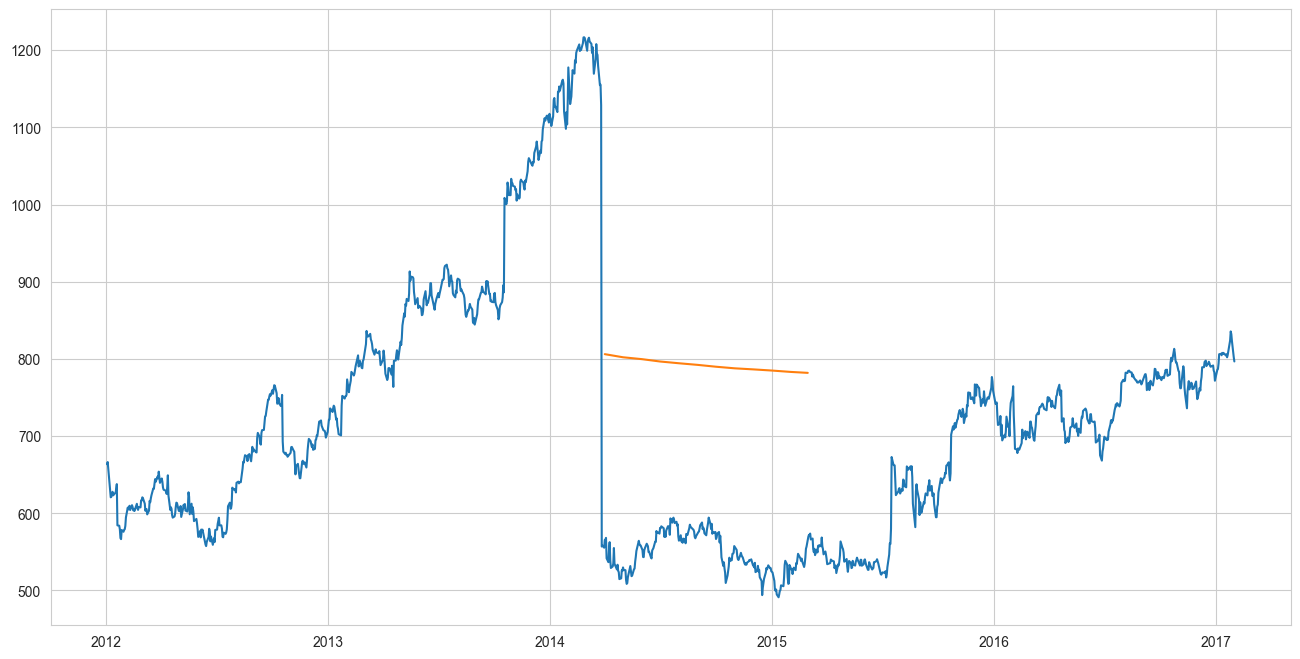

In [77]:
plt.figure(figsize = (16, 8))
plt.plot(full_data.index, full_data['Close'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

In [78]:
test.head()

,Close
Date,
2017-01-03,786.140
2017-01-04,786.900
2017-01-05,794.020
2017-01-06,806.150
2017-01-09,806.650


In [79]:
forecast_index = pd.date_range(start = '2017-01-03', periods = length, freq = 'MS')


In [80]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

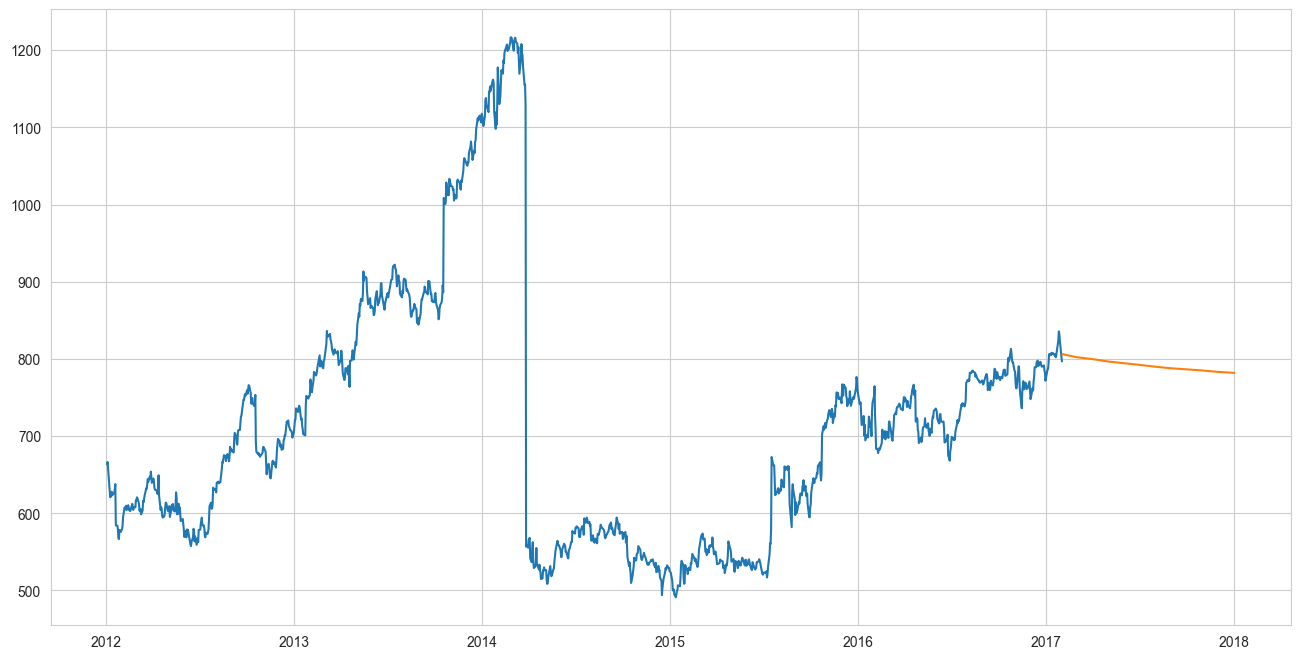

In [81]:
plt.figure(figsize = (16, 8))
plt.plot(full_data.index, full_data['Close'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1E90FF ; color : #FFCE30; border-radius: 6px 6px; padding:3px;text-align:center; font-weight: bold" >💪 Congratulations 💪 </h2> 